In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Plots for comparing Actual and Predicted Statistics on Generation

In [3]:
base_path = "/nfs/c9/"
project_path = "mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/"

In [4]:
canon_canon = base_path + project_path + "src/statistics/general_statistics/selfies/canon_canon.xlsx"
canon_rand= base_path + project_path + "src/statistics/general_statistics/selfies/canon_rand.xlsx"
rand_canon = base_path + project_path + 'src/statistics/general_statistics/selfies/rand_canon.xlsx'
rand_rand = base_path + project_path + 'src/statistics/general_statistics/selfies/rand_rand.xlsx'

rand_rand_data = pd.read_excel(rand_rand)
rand_canon_data = pd.read_excel(rand_canon)
canon_rand_data = pd.read_excel(canon_rand)
canon_canon_data = pd.read_excel(canon_canon)


In [5]:
categories = ['Unique TP', 'Duplicated TP', 'Out of Distribution']
subset_names = ['Aspirin', 'Sas', 'Druglike', 'Equal Distance']
num_gen = 1_000_000

def get_actual_results(data):
    results = {'Aspirin': [], 'Sas': [], 'Druglike': [], 'Equal Distance': []}
    for idx, subset in enumerate(subset_names):
        dup_tp = data['Actual Duplicated TP'][idx]
        uniq_tp = data['Actual Unique TP'][idx]
        diff_dup_uniq = dup_tp - uniq_tp
        out_of_dist = num_gen - dup_tp
        results[subset].extend([uniq_tp, diff_dup_uniq, out_of_dist])

    return results

def get_predicted_results(data):
    results = {'Aspirin': [], 'Sas': [], 'Druglike': [], 'Equal Distance': []}
    for idx, subset in enumerate(subset_names):
        dup_tp = data['Predicted Duplicated TP'][idx]
        uniq_tp = data['Predicted Unique TP'][idx]
        diff_dup_uniq = dup_tp - uniq_tp
        out_of_dist = num_gen - dup_tp
        results[subset].extend([uniq_tp, diff_dup_uniq, out_of_dist])

    return results

results_rand_rand = get_actual_results(rand_rand_data)
results_rand_canon = get_actual_results(rand_canon_data)
results_canon_rand = get_actual_results(canon_rand_data)
results_canon_canon = get_actual_results(canon_canon_data)

results_rand_rand_pred = get_predicted_results(rand_rand_data)
results_rand_canon_pred = get_predicted_results(rand_canon_data)
results_canon_rand_pred = get_predicted_results(canon_rand_data)
results_canon_canon_pred = get_predicted_results(canon_canon_data)

In [6]:
def plot_gen_stats(results, results_pred, save):
    actuals = results
    preds = results_pred

    first_row = []
    second_row = []
    third_row = []

    pred_first_row = []
    pred_second_row = []
    pred_third_row = []

    for i in actuals:
        first_row.append(actuals[i][0])     
        second_row.append(actuals[i][1])
        third_row.append(actuals[i][2])

    for i in preds:
        pred_first_row.append(preds[i][0])     
        pred_second_row.append(preds[i][1])
        pred_third_row.append(preds[i][2])
    fig = plt.figure(figsize=(7, 4))
    ax = fig.add_subplot(1, 1, 1)

    names = ['$S_{asp}$', '$S_{sas}$', '$S_{d>p}$', '$S_{d=p}$']
    ind = np.arange(4)

    plt.xticks([250000,500000,750000,1000000])
    ax.set_xticklabels(['250,000', '500,000', '750,000', '1,000,000'])
    ax.yaxis.set_visible(False)

    height = 0.3
    out = height

    # Horizontal bars for actual data
    for i, (f, s, t) in enumerate(zip(first_row, second_row, third_row)):
        ax.barh(ind[i], f, height=height, color='#32874A', edgecolor='black', linewidth=1)
        ax.barh(ind[i], s, left=f, height=height, color='#ffdd77', edgecolor='black', linewidth=1)
        ax.barh(ind[i], t, left=np.array(f) + np.array(s), height=height, color=(0.89888504, 0.30549789, 0.20676663, 1. ), edgecolor='black', linewidth=1)

    # Horizontal bars for predicted data
    for i, (f, s, t) in enumerate(zip(pred_first_row, pred_second_row, pred_third_row)):
        ax.barh(ind[i] + out, f, height=height, color=(0.24805844, 0.66720492, 0.3502499 , 0.4 ), edgecolor='black', linewidth=1)
        ax.barh(ind[i] + out, s, left=f, height=height, color=(0.99707805, 0.9987697 , 0.74502115, 0.5), edgecolor='black', linewidth=1)
        ax.barh(ind[i] + out, t, left=np.array(f) + np.array(s), height=height, color=(0.89888504, 0.30549789, 0.20676663, 0.4 ), edgecolor='black', linewidth=1)

    # Add labels indicating actual and predicted data
    for i, subset in enumerate(names):
        # ax.text(50000, ind[i], 'Generated', ha='center', va='center')
        # ax.text(-50000, ind[i]+ out, 'Predicted', ha='center', va='center')
        ax.text(1100000, ind[i], subset, ha='center', va='center')

    # Add custom legend
    legend_handles_1 = [mpatches.Patch(color='#32874A'), mpatches.Patch(color='#ffdd77'), mpatches.Patch(color=(0.89888504, 0.30549789, 0.20676663, 1. ))]
    ax.legend(handles=legend_handles_1, labels=['In Subset Molecules', 'Duplicates', 'Out of Subset Molecules'], loc='lower right',bbox_to_anchor=(1, 1.1), edgecolor='black')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 1])

    plt.savefig(save)
    # plt.title(f'Pre-Train: {pretrain}, Fine-Tune: {finetune}')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/actual_pred_canon_canon.pdf'

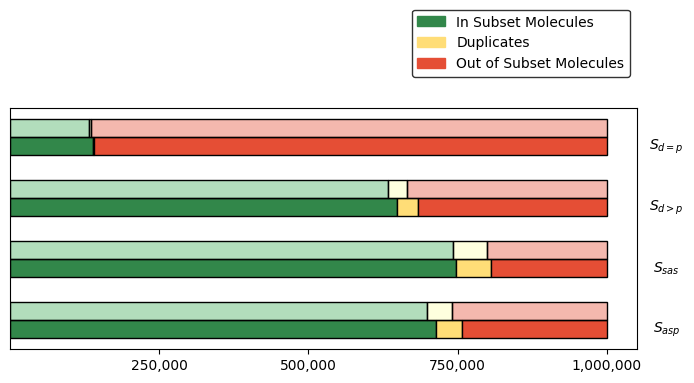

In [7]:
plot_gen_stats(results_canon_canon, results_canon_canon_pred, '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/actual_pred_canon_canon.pdf')

### Alternatve Graphics

In [20]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    ax.set_xticks([250000, 500000, 750_000, 1000000])
    labels = ['250,000', '500,000', '750,000', '1,000,000']
    ax.set_xticklabels(labels)

    ax.set_yticks(np.arange(len(results.keys())))
    ax.set_yticklabels(results.keys())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        # r, g, b, _ = color
        # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=1, bbox_to_anchor=(1.24,1.1),
              loc='upper right', fontsize='small')

    return fig, ax

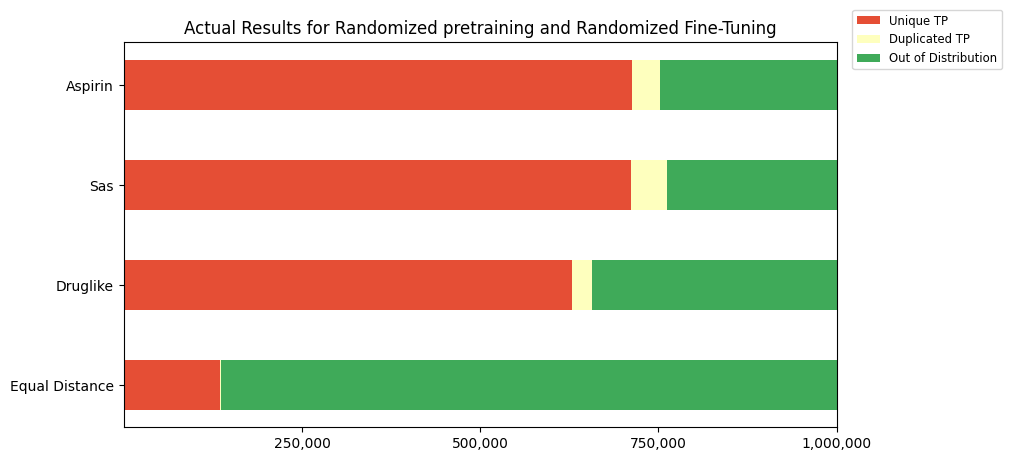

In [21]:
survey(results_rand_rand, categories)
plt.title("Actual Results for Randomized pretraining and Randomized Fine-Tuning")
plt.show()

## Aspirin 1M temperature generation plots

In [8]:
def plot_temp_scatter(df,save_path,metric_type):
    metric = list(df[metric_type])
    temperature = list(df['Temp'])

    plt.figure(figsize=(10, 6))

    if metric_type == 'Recall':
        color = '#2ca02c'
        plt.axhline(y=11.37, color='#8B0000', linewidth=2,label='Upper Bound (i.i.d.)')
        
    elif metric_type == 'Precision':
        color = '#ffbf00'
    # Plot the data with different styles and colors
    # plt.plot(temp, precision, marker='o', linestyle='-', color='#ffbf00', label='Precision (%)')
    plt.plot(temperature, metric, marker='s', linestyle='--', color=color, label=f'{metric_type} (%)')
    
    # plot a black horizontal line at y=11.37
    # Use a logarithmic scale if needed
    # plt.yscale('log')

    # Add labels and title with a subtitle
    plt.xlabel('Temperature', fontsize=14, labelpad=12)
    # plt.title(f'Pre-Training: {pretrain}, Fine-Tuning: {finetune}', fontsize=14)

    # Customize grid and background
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('white')

    # Position the legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 1])

    plt.savefig(save_path, format="pdf")
    # Show the plot
    plt.show()

In [9]:
subset = 'aspirin'
path = base_path + project_path + 'src/statistics/actual_generation_statistics/selfies/aspirin'
temps = [0.9, 0.8, 1.1, 1.3, 1.5, 1.7, 1.8, 0.7, 0.6, 0.95,1]
canon_canon = [os.path.join(path,f'PRETRAIN_canon_FINETUNE_canon_FROM_GEN_1M_GEN_LEN_1M_TEMP_{tmp}.xlsx') for tmp in temps]
canon_rand = [os.path.join(path,f'PRETRAIN_canon_FINETUNE_rand_FROM_GEN_1M_GEN_LEN_1M_TEMP_{tmp}.xlsx') for tmp in temps]

In [10]:
canon_canon_df = pd.DataFrame()
canon_rand_df = pd.DataFrame()

for file in canon_canon:
    canon_canon_df = pd.concat([canon_canon_df,pd.read_excel(file)])
canon_canon_df['Temp'] = temps
canon_canon_df = canon_canon_df.reset_index()
canon_canon_df = canon_canon_df.drop('index',axis=1)
canon_canon_df = canon_canon_df.sort_values(by='Temp')

for file in canon_rand:
    canon_rand_df = pd.concat([canon_rand_df,pd.read_excel(file)])
canon_rand_df['Temp'] = temps
canon_rand_df = canon_rand_df.reset_index()
canon_rand_df = canon_rand_df.drop('index',axis=1)
canon_rand_df = canon_rand_df.sort_values(by='Temp')

In [11]:
canon_canon_df['Generation'] = [1_000_000]*11
canon_canon_df['Precision'] = (canon_canon_df['Actual Duplicated TP']/canon_canon_df['Generation'])*100
canon_canon_df['Recall'] = (canon_canon_df['Actual Unique TP']/8284280)*100
canon_canon_df = canon_canon_df.drop(columns=['Actual Duplicated TP', 'Actual Unique TP', 'Generation'])

In [12]:
canon_rand_df['Generation'] = [1_000_000]*11
canon_rand_df['Precision'] = (canon_rand_df['Actual Duplicated TP']/canon_rand_df['Generation'])*100
canon_rand_df['Recall'] = (canon_rand_df['Actual Unique TP']/8284280)*100
canon_rand_df = canon_rand_df.drop(columns=['Actual Duplicated TP', 'Actual Unique TP', 'Generation'])

In [13]:
canon_canon_df

,Temp,Precision,Recall
8,0.60,88.5516,8.126138
7,0.70,86.0074,8.970375
1,0.80,83.0220,9.156909
0,0.90,79.4689,8.971389
9,0.95,77.7088,8.818376
10,1.00,75.6477,8.612432
2,1.10,71.5583,8.162013
3,1.30,62.1868,7.035856
4,1.50,52.2593,5.834726
5,1.70,42.2480,4.649082


In [16]:
canon_canon_df["Recall"].tolist()

[8.126137696939264,
 8.97037521667544,
 9.156909230494383,
 8.971389185300351,
 8.818376491378853,
 8.612432221025847,
 8.162012872573115,
 7.035855861945757,
 5.83472552835008,
 4.649082358394454,
 4.085762431979605]

In [1]:
canon_rand_df

NameError: name 'canon_rand_df' is not defined

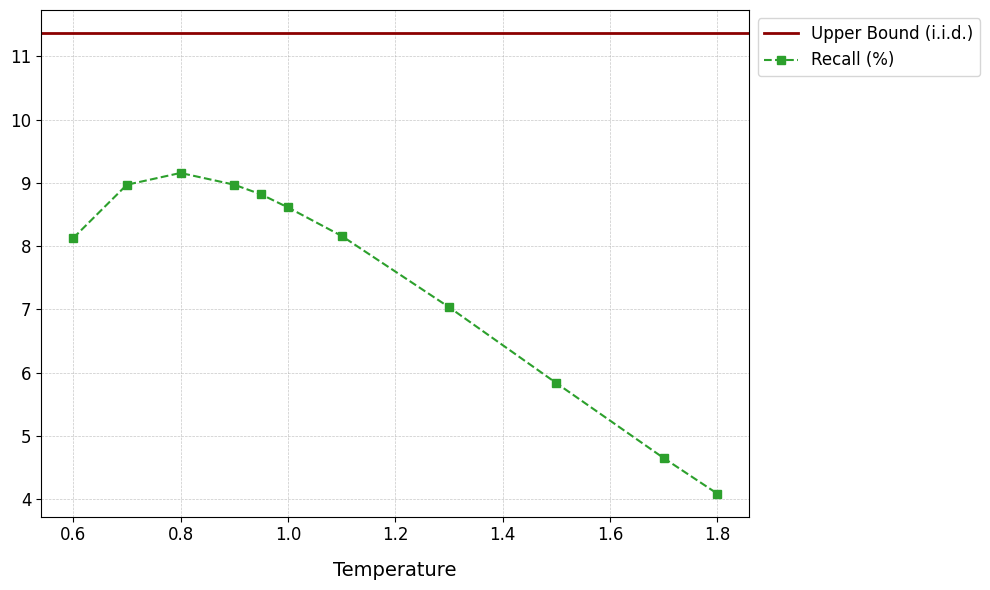

In [16]:
plot_temp_scatter(canon_canon_df, '../plots/aspirin_temp_canon_canon_recall.pdf', 'Recall')

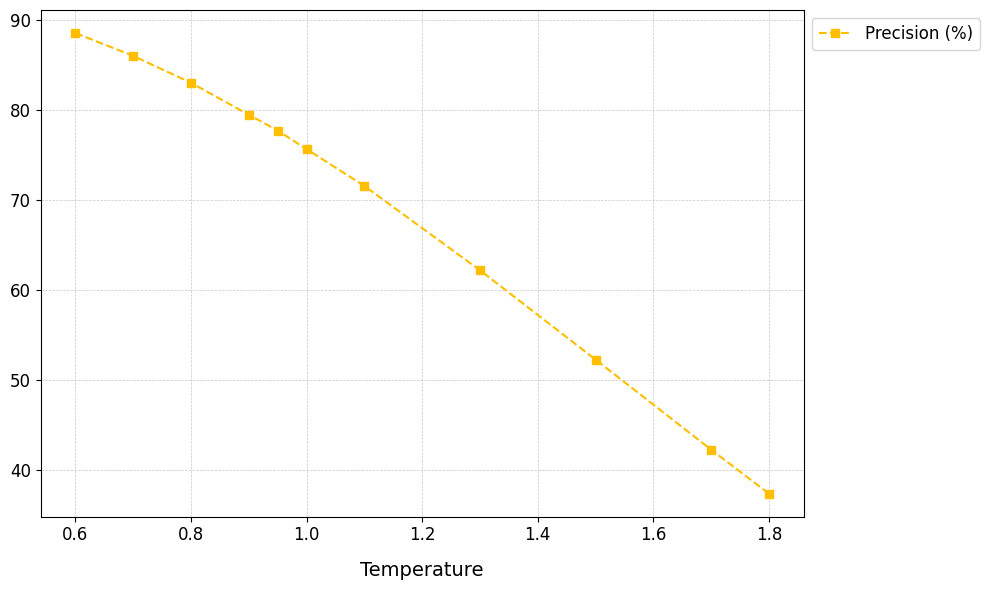

In [17]:
plot_temp_scatter(canon_canon_df, '../plots/aspirin_temp_canon_canon_precision.pdf', 'Precision')

In [5]:
def metrics_pred_temp(results, save_path):
    # Data
    # temp = np.log(results['Temp'])
    temp = results['Temp']

    precision = results['Precision']
    recall = results['Recall']

    # Create the figure and axis
    fig, ax1 = plt.subplots()

    # Plot recall on the left y-axis
    ax1.plot(temp, recall, 'b-', marker='o', label='Recall')
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('Recall', color='b')
    ax1.tick_params('y', colors='b')

    # Create a second y-axis for precision
    ax2 = ax1.twinx()
    ax2.plot(temp, precision, 'r-', marker='x', label='Precision')
    ax2.set_ylabel('Precision', color='r')
    ax2.tick_params('y', colors='r')

    # Add a title and grid
    plt.title('Recall and Precision vs Temperature for 4M')
    ax1.grid(True)

    plt.savefig(save_path, format='pdf')
    # Show the plot
    plt.show()


In [34]:
canon_aspirin_1M_df = pd.DataFrame()

canon_aspirin_1M_df["Temp"] = canon_canon_df["Temp"]
canon_aspirin_1M_df["Precision"] = canon_canon_df["Precision"]
canon_aspirin_1M_df["Recall"] = canon_canon_df["Recall"]


canon_aspirin_4M_df = pd.DataFrame()

canon_aspirin_4M_df['Temp'] = np.array([0.6, 0.8, 1.0, 1.2, 1.5])
canon_aspirin_4M_df['Precision'] = np.array([3541690, 3321118, 3027357, 2678628, 2087967])/4*100
canon_aspirin_4M_df['Recall'] = np.array([1791672, 2405129, 2421752, 2152226, 1606785])/8284280*100

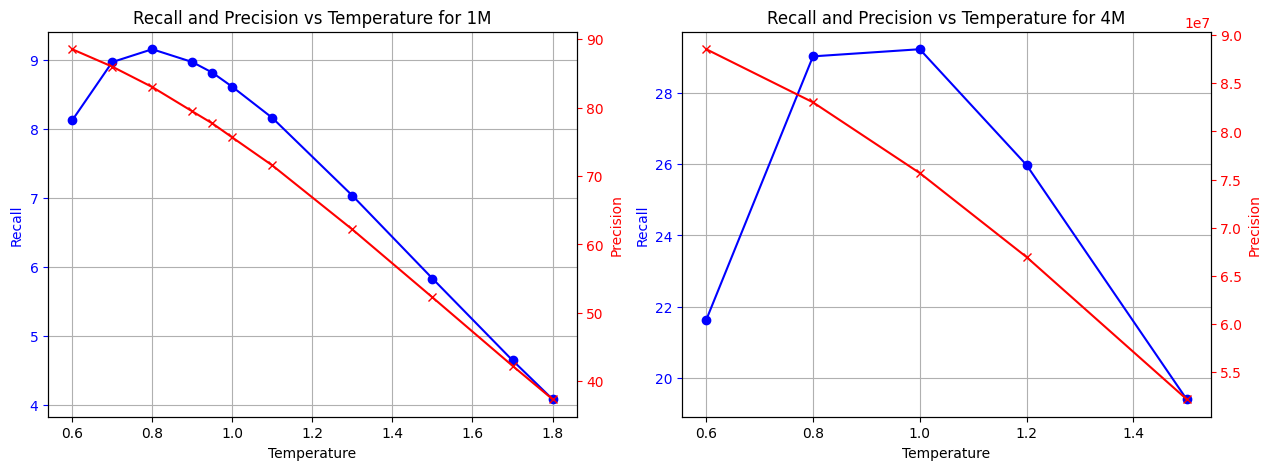

In [40]:


# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot recall on the left y-axis
axes[0].plot(canon_aspirin_1M_df["Temp"], canon_aspirin_1M_df["Recall"], 'b-', marker='o', label='Recall')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Recall', color='b')
axes[0].tick_params('y', colors='b')

# Create a second y-axis for precision
ax2 = axes[0].twinx()
ax2.plot(canon_aspirin_1M_df["Temp"], canon_aspirin_1M_df["Precision"], 'r-', marker='x', label='Precision')
ax2.set_ylabel('Precision', color='r')
ax2.tick_params('y', colors='r')

# Add a title and grid
plt.title('Recall and Precision vs Temperature for 1M')
axes[0].grid(True)


# Plot recall on the left y-axis
axes[1].plot(canon_aspirin_4M_df["Temp"], canon_aspirin_4M_df["Recall"], 'b-', marker='o', label='Recall')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Recall', color='b')
axes[1].tick_params('y', colors='b')

# Create a second y-axis for precision
ax3 = axes[1].twinx()
ax3.plot(canon_aspirin_4M_df["Temp"], canon_aspirin_4M_df["Precision"], 'r-', marker='x', label='Precision')
ax3.set_ylabel('Precision', color='r')
ax3.tick_params('y', colors='r')

# Add a title and grid
plt.title('Recall and Precision vs Temperature for 4M')
axes[1].grid(True)

plt.savefig('../plots/canon_aspirin_temp_1M_vs_4M.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()



## 1K-10M Generations Plots

In [50]:
def plot_gens_scatter(df, subset_length,save):
    actual_dup_tp = list(df['Actual Duplicated TP'])
    actual_uniq_tp = list(df['Actual Unique TP'])
    gen = list(df['Gen Length'])

    recall = ((df['Actual Unique TP']/subset_length)*100).iloc[-1]
    # precision = ((df['Actual Duplicated TP']/df['Gen Length'])*100).iloc[-1]

    x = np.linspace(0, subset_length, 1000)
    y = x

    x_full = np.linspace(0, 10_000_000, 10000)
    upper_bound = subset_length * (1-(1-1/subset_length)**x_full)

    # Generate subset length line
    subset_length_line = np.array([subset_length] * 10000)

    plt.figure(figsize=(8.5, 4.5))

    # Plot the reference lines
    plt.plot(x, y, color='#d62728', linestyle='--', label='Ideal Case')
    plt.plot(x_full, upper_bound, color='#2ca02c', linestyle='--', label='Upper Bound (i.i.d.)')
    plt.plot(x_full, subset_length_line, color='black', linestyle='--', label='Size of the Set ($M$)')

    # Set y-axis limit
    plt.ylim(0, 10_000_000)

    # Annotate recall and diff percentages
    # plt.text(gen[-1], actual_dup_tp[-1], f'{round(precision, 2)}%', verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='blue')
    plt.text(gen[-1], actual_uniq_tp[-1], f'{round(recall, 2)}%', fontsize=11, verticalalignment='bottom', horizontalalignment='center', color='green')

    # Plot actual data points
    plt.plot(gen, actual_dup_tp, marker='o', linestyle='-', color='#ffbf00', label='True Positives')
    plt.plot(gen, actual_uniq_tp, marker='o', linestyle='-', color='#2ca02c', label='Unique True Positives')
    # plt.plot(gen, beam_uniq_tp, marker='o', linestyle='-', color='pink', label='Beam Unique True Positives')

    # Add labels and title
    plt.xlabel('Number of Generated SELFIES', fontsize=14, labelpad=12)
    # plt.ylabel('True Positives', fontsize=12)
    # plt.title(f'Pre-Training: {pretrain}, Fine-Tuning: {finetune}', fontsize=12)

    # Customize grid and background
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('white')

    # Position the legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, edgecolor='black')
    plt.tick_params(axis='both', which='major', labelsize=12)
    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 1])

    plt.savefig(save, format='pdf')
    # Show the plot
    plt.show()

# Example usage:
# plot_gens_scatter(subset, df, pretrain, finetune, subset_length, recall, diff)


In [32]:
gen_lengths = [1_000, 10_000, 100_000, '1M', 2_000_000, 6_000_000, 8_000_000, '10M']

### General Stats

In [33]:
subsets = ['aspirin', 'sas', 'druglike', 'eqdist']
pretrain = ['canon','rand']
finetune = ['canon','rand']

for p in pretrain:
    for f in finetune:
        statistics = {'Subset':[], 'Actual Duplicated TP':[], 'Actual Unique TP':[]}
        for subset in subsets:
            df = pd.read_excel(base_path + project_path + f'src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{p}_FINETUNE_{f}_FROM_GEN_10M_GEN_LEN_10M_TEMP_1.xlsx')
            dup = df['Actual Duplicated TP'][0]
            uniq = df['Actual Unique TP'][0]
            statistics['Subset'].append(subset)
            statistics['Actual Duplicated TP'].append(dup)
            statistics['Actual Unique TP'].append(uniq)
        stats_df =pd.DataFrame(statistics)
        PATH = base_path + project_path + f'/src/statistics/general_statistics/{p}_{f}_10M.xlsx'
        # stats_df.to_excel(PATH, index=False)

In [34]:
canon_canon = pd.read_excel(base_path + project_path + 'src/statistics/general_statistics/selfies/canon_canon_10M_original.xlsx')
canon_rand = pd.read_excel(base_path + project_path + 'src/statistics/general_statistics/selfies/canon_rand_10M_original.xlsx')
rand_canon = pd.read_excel(base_path + project_path + 'src/statistics/general_statistics/selfies/rand_canon_10M_original.xlsx')
rand_rand = pd.read_excel(base_path + project_path + 'src/statistics/general_statistics/selfies/rand_rand_10M_original.xlsx')

In [35]:
tables = [canon_canon, canon_rand, rand_canon, rand_rand]

In [36]:
subset_len = {'aspirin': 8284280,
'sas' : 6645440,
'druglike' : 9331077,
'eqdist' : 8051185 }
subset_length = [8284280, 6645440, 9331077, 8051185]

In [37]:
for t in tables:
    t['Subset Length'] = subset_length

In [38]:
for df in tables:
    df['Recall'] = (df['Actual Unique TP']/df['Subset Length'])*100

In [39]:
for df in tables:
    diff = df['Actual Duplicated TP'] - df['Actual Unique TP']
    df['Diff'] = (diff/df['Actual Duplicated TP'])*100

In [40]:
canon_canon

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Diff
0,aspirin,7569055,7399390,169665,4558240,4486343,71897,10000,0.000893,8284280,55.022766,39.777951
1,sas,8058081,7991131,66950,4303269,4279902,23367,10000,0.001202,6645440,64.755216,46.596851
2,druglike,6827435,6653951,173484,4369476,4293835,75641,10000,0.000713,9331077,46.827135,36.001207
3,eqdist,1407172,1350754,56418,1222933,1178540,44393,10000,0.000168,8051185,15.189478,13.092856


In [41]:
canon_rand

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Diff
0,aspirin,7059369,7017213,42156,4452203,4433416,18787,10000,0.000847,8284280,53.742788,36.931998
1,sas,7326080,7338257,12177,4134374,4143258,8884,10000,0.001104,6645440,62.213698,43.566355
2,druglike,6163090,6094771,68319,4189576,4152256,37320,10000,0.000653,9331077,44.899169,32.021502
3,eqdist,1086664,1079342,7322,997388,991570,5818,10000,0.000134,8051185,12.388089,8.215603


In [42]:
rand_canon

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Diff
0,aspirin,7616563,7455878,160685,4540085,4468146,71939,10000,0.000900,8284280,54.803616,40.391946
1,sas,8026134,7977750,48384,4265002,4245006,19996,10000,0.001200,6645440,64.179377,46.861067
2,druglike,6893833,6782528,111305,4363563,4316162,47401,10000,0.000727,9331077,46.763766,36.703384
3,eqdist,1458330,1411841,46489,1261295,1223884,37411,10000,0.000175,8051185,15.665955,13.511002


In [43]:
rand_rand

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Diff
0,aspirin,7515469,7482479,32990,4672525,4659205,13320,10000,0.000903,8284280,56.402307,37.827899
1,sas,7617117,7638271,21154,4258098,4269162,11064,10000,0.001149,6645440,64.075486,44.098299
2,druglike,6566746,6518009,48737,4430389,4404024,26365,10000,0.000699,9331077,47.479932,32.532962
3,eqdist,1367136,1367181,45,1233863,1233968,105,10000,0.000170,8051185,15.325235,9.748335


### Aspirin

In [44]:
subset = 'aspirin'
pretrain = 'canon'
finetune = 'canon'

aspirin_canon_canon = [base_path + project_path + f'src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [45]:
subset = 'aspirin'
pretrain = 'canon'
finetune = 'rand'

aspirin_canon_rand = [base_path + project_path + f'src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [46]:
subset = 'aspirin'
pretrain = 'rand'
finetune = 'canon'

aspirin_rand_canon = [base_path + project_path + f'src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [47]:
subset = 'aspirin'
pretrain = 'rand'
finetune = 'rand'

aspirin_rand_rand = [base_path + project_path + f'src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [48]:
gen_len = [1_000, 10_000, 100_000, 1_000_000, 2_000_000, 6_000_000, 8_000_000, 10_000_000]
gen_len_str = ['1K','10K','100K','1M','2M','6M','8M', '10M']

aspirin_canon_canon_df = pd.DataFrame()
aspirin_canon_rand_df = pd.DataFrame()
aspirin_rand_canon_df = pd.DataFrame()
aspirin_rand_rand_df = pd.DataFrame()

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in aspirin_canon_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
aspirin_canon_canon_df = pd.DataFrame(tmp)
aspirin_canon_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in aspirin_canon_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
aspirin_canon_rand_df = pd.DataFrame(tmp)
aspirin_canon_rand_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in aspirin_rand_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
aspirin_rand_canon_df = pd.DataFrame(tmp)
aspirin_rand_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in aspirin_rand_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
aspirin_rand_rand_df = pd.DataFrame(tmp)
aspirin_rand_rand_df['Gen Length'] = gen_len

In [2]:
4326475/ 8282280


0.5223772922431987

In [3]:
2442454 / 8282280

0.2949011624818287

actual
[748, 7539, 75462, 756477, 1513080, 4541560, 6055151, 7569055]
[1000, 10000, 100000, 1000000, 2000000, 6000000, 8000000, 10000000]


ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

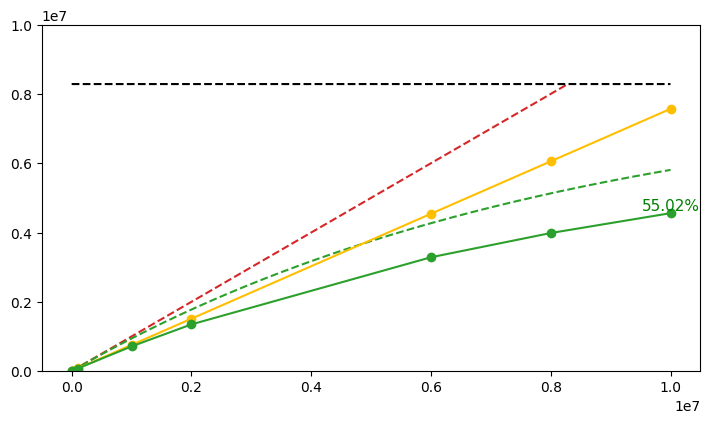

In [51]:
plot_gens_scatter(aspirin_canon_canon_df, subset_length=8284280, save = '../plots/aspirin_canon_canon_1K_10M.pdf')

beam_tp = list(-, -, 930800, -, None, 4860397, None, 710300)

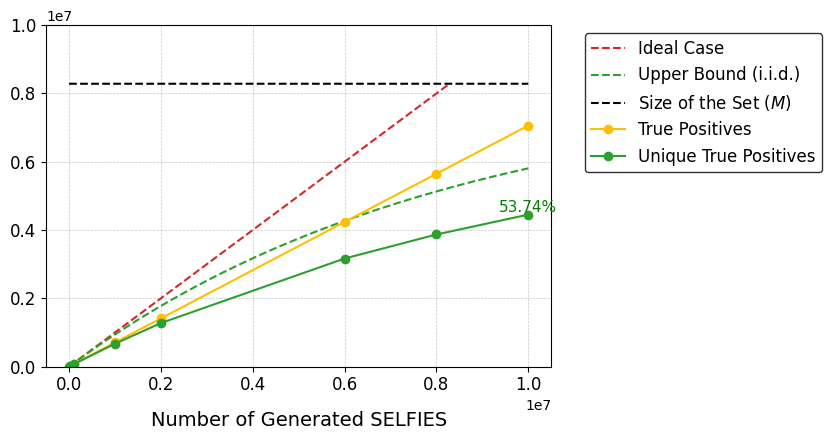

In [89]:
plot_gens_scatter(aspirin_canon_rand_df, subset_length=8284280, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/aspirin_canon_rand_1K_10M.pdf')

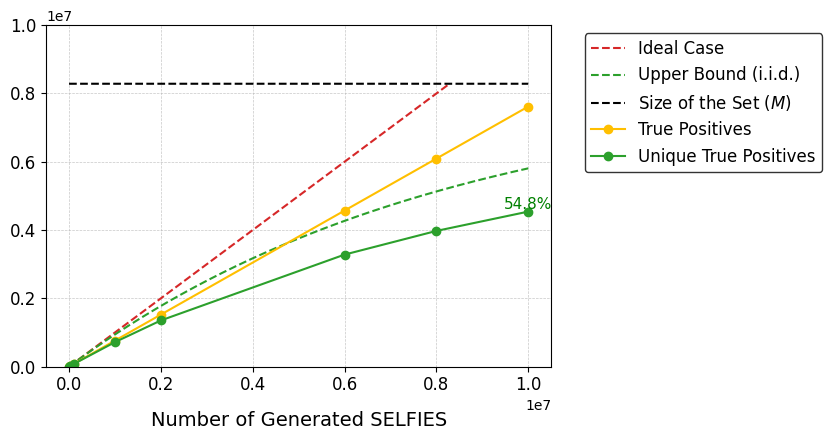

In [90]:
plot_gens_scatter(aspirin_rand_canon_df, subset_length=8284280, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/aspirin_rand_canon_1K_10M.pdf')

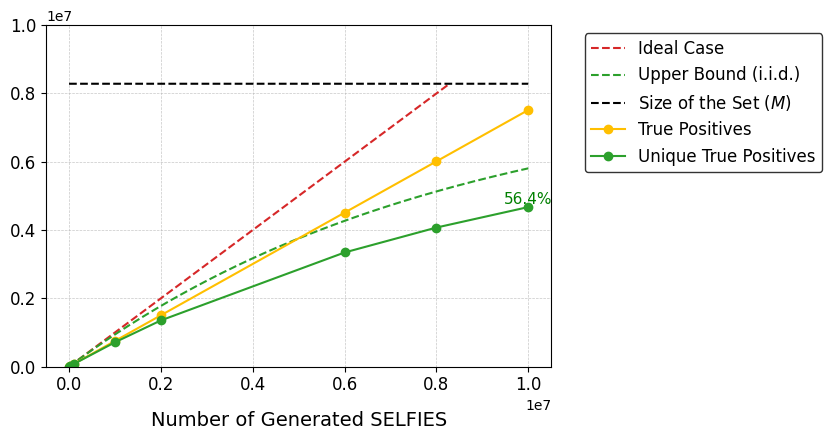

In [93]:
plot_gens_scatter(aspirin_rand_rand_df, subset_length=8284280, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/aspirin_rand_rand_1K_10M.pdf')

### Sas

In [94]:
subset = 'sas'
pretrain = 'canon'
finetune = 'canon'

sas_canon_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [95]:
subset = 'sas'
pretrain = 'canon'
finetune = 'rand'

sas_canon_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [96]:
subset = 'sas'
pretrain = 'rand'
finetune = 'canon'

sas_rand_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [97]:
subset = 'sas'
pretrain = 'rand'
finetune = 'canon'

sas_rand_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [98]:
# Sas
import pandas as pd

gen_len = [1_000, 10_000, 100_000, 1_000_000, 2_000_000, 6_000_000, 8_000_000, 10_000_000]
gen_len_str = ['1K','10K','100K','1M','2M','6M','8M', '10M']

sas_canon_canon_df = pd.DataFrame()
sas_canon_rand_df = pd.DataFrame()
sas_rand_canon_df = pd.DataFrame()
sas_rand_rand_df = pd.DataFrame()

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in sas_canon_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
sas_canon_canon_df = pd.DataFrame(tmp)
sas_canon_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in sas_canon_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
sas_canon_rand_df = pd.DataFrame(tmp)
sas_canon_rand_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in sas_rand_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
sas_rand_canon_df = pd.DataFrame(tmp)
sas_rand_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in sas_rand_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
sas_rand_rand_df = pd.DataFrame(tmp)
sas_rand_rand_df['Gen Length'] = gen_len

print(sas_canon_canon_df, sas_canon_rand_df, sas_rand_canon_df, sas_rand_rand_df)

   Actual Duplicated TP  Actual Unique TP  Gen Length
0                   833               833        1000
1                  8034              8027       10000
2                 80651             80064      100000
3                805514            747632     1000000
4               1610651           1391118     2000000
5               4834296           3223451     6000000
6               6445859           3830300     8000000
7               8058081           4303269    10000000    Actual Duplicated TP  Actual Unique TP  Gen Length
0                   731               731        1000
1                  7348              7339       10000
2                 73206             72695      100000
3                732804            686069     1000000
4               1465877           1286755     2000000
5               4396508           3049520     6000000
6               5860959           3654323     8000000
7               7326080           4134374    10000000    Actual Duplicated TP  Act

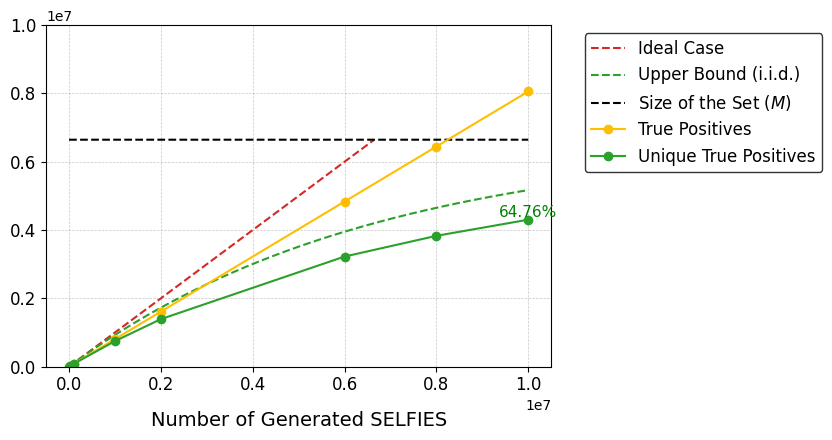

In [99]:
plot_gens_scatter(sas_canon_canon_df, subset_length = 6645440, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/sas_canon_canon_1K_10M.pdf')

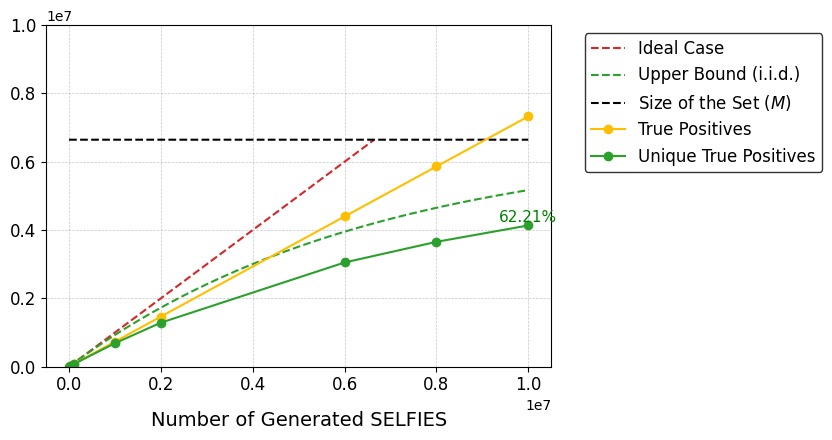

In [100]:
plot_gens_scatter(sas_canon_rand_df, subset_length = 6645440, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/sas_canon_rand_1K_10M.pdf')

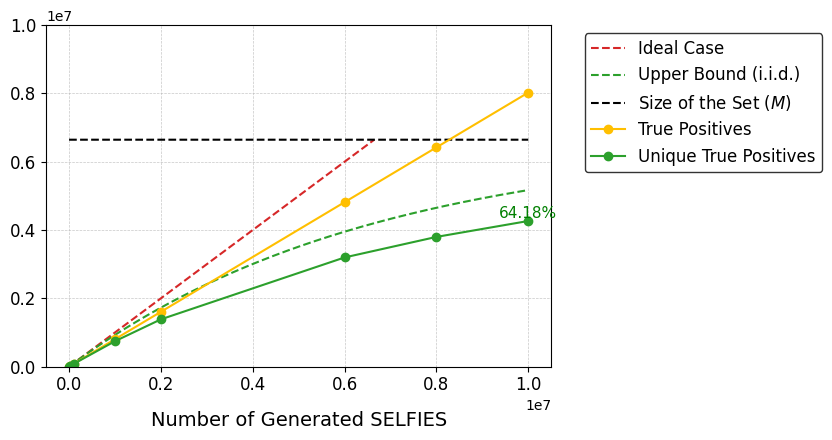

In [101]:
plot_gens_scatter(sas_rand_canon_df, subset_length = 6645440, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/sas_rand_canon_1K_10M.pdf')

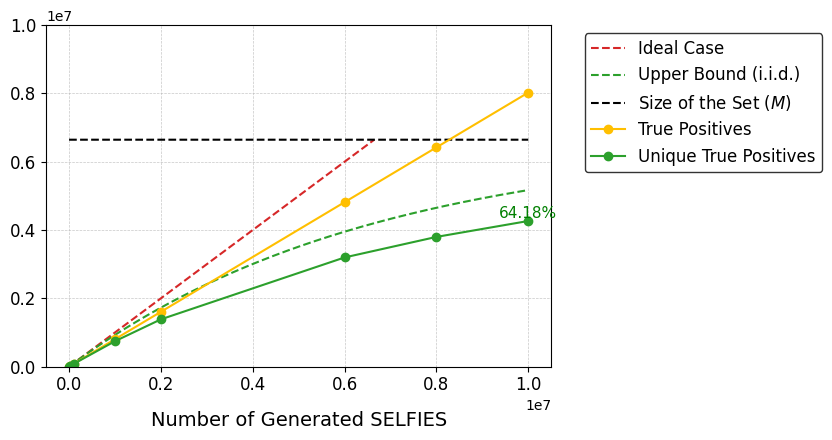

In [103]:
plot_gens_scatter(sas_rand_rand_df, subset_length = 6645440, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/sas_rand_rand_1K_10M.pdf')

### Druglike

In [104]:
subset = 'druglike'
pretrain = 'canon'
finetune = 'canon'

druglike_canon_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [105]:
subset = 'druglike'
pretrain = 'canon'
finetune = 'canon'

druglike_canon_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [106]:
subset = 'druglike'
pretrain = 'rand'
finetune = 'canon'

druglike_rand_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [107]:
subset = 'druglike'
pretrain = 'rand'
finetune = 'rand'

druglike_rand_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [108]:
# Druglike
import pandas as pd

gen_len = [1_000, 10_000, 100_000, 1_000_000, 2_000_000, 6_000_000, 8_000_000, 10_000_000]
gen_len_str = ['1K','10K','100K','1M','2M','6M','8M', '10M']

druglike_canon_canon_df = pd.DataFrame()
druglike_canon_rand_df = pd.DataFrame()
druglike_rand_canon_df = pd.DataFrame()
druglike_rand_rand_df = pd.DataFrame()

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in druglike_canon_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
druglike_canon_canon_df = pd.DataFrame(tmp)
druglike_canon_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in druglike_canon_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
druglike_canon_rand_df = pd.DataFrame(tmp)
druglike_canon_rand_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in druglike_rand_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
druglike_rand_canon_df = pd.DataFrame(tmp)
druglike_rand_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in druglike_rand_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
druglike_rand_rand_df = pd.DataFrame(tmp)
druglike_rand_rand_df['Gen Length'] = gen_len

print(druglike_canon_canon_df, druglike_canon_rand_df, druglike_rand_canon_df, druglike_rand_rand_df)

   Actual Duplicated TP  Actual Unique TP  Gen Length
0                   688               688        1000
1                  6850              6843       10000
2                 68462             68108      100000
3                683074            648842     1000000
4               1366165           1234729     2000000
5               4096055           3081152     6000000
6               5461631           3780925     8000000
7               6827435           4369476    10000000    Actual Duplicated TP  Actual Unique TP  Gen Length
0                   688               688        1000
1                  6850              6843       10000
2                 68462             68108      100000
3                683074            648842     1000000
4               1366165           1234729     2000000
5               4096055           3081152     6000000
6               5461631           3780925     8000000
7               6827435           4369476    10000000    Actual Duplicated TP  Act

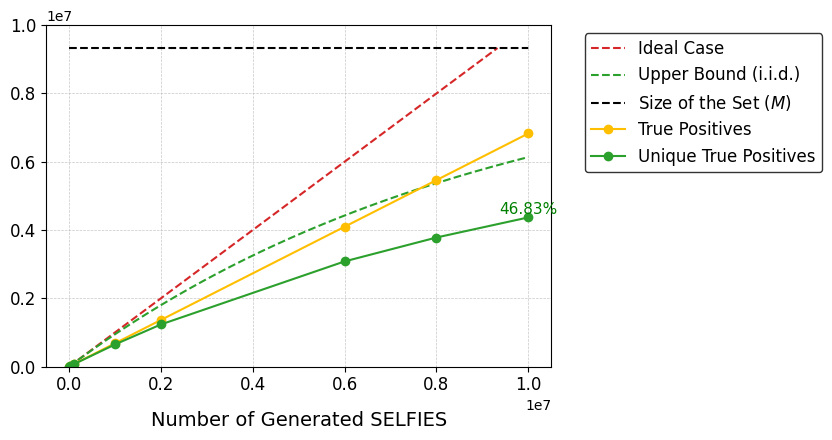

In [109]:
plot_gens_scatter(druglike_canon_canon_df, subset_length=9331077, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/druglike_canon_canon_1K_10M.pdf')

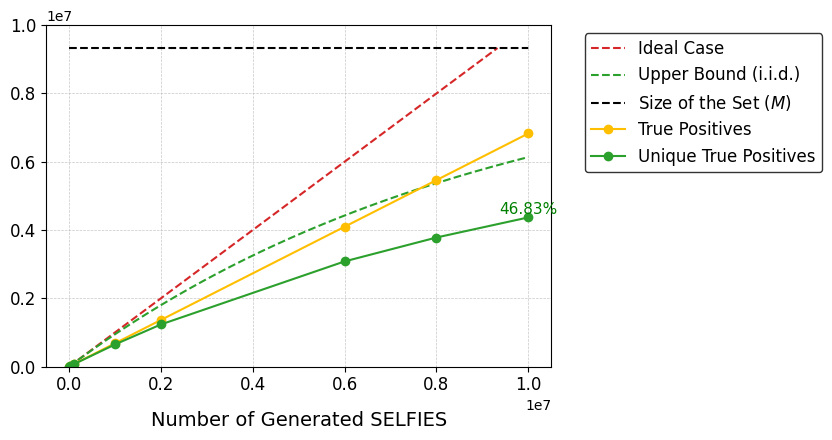

In [110]:
plot_gens_scatter(druglike_canon_rand_df, subset_length=9331077, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/druglike_canon_rand_1K_10M.pdf')

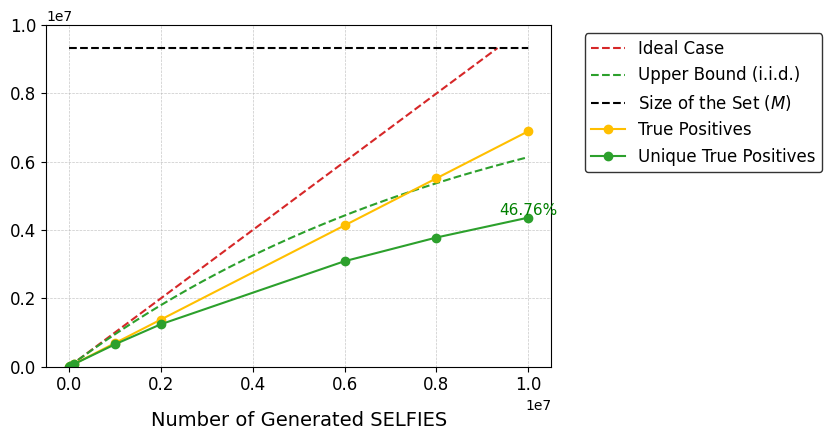

In [111]:
plot_gens_scatter(druglike_rand_canon_df, subset_length=9331077, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/druglike_rand_canon_1K_10M.pdf')

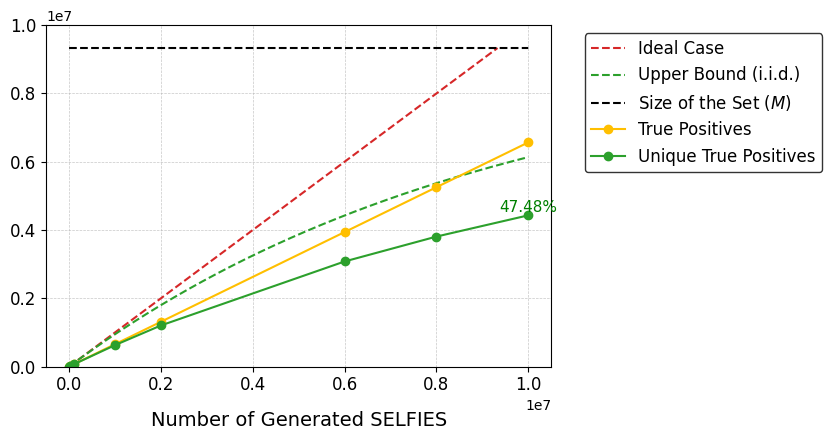

In [112]:
plot_gens_scatter(druglike_rand_rand_df, subset_length=9331077, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/druglike_rand_rand_1K_10M.pdf')

### Eqdist

In [113]:
subset = 'eqdist'
pretrain = 'canon'
finetune = 'canon'

eqdist_canon_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [114]:
subset = 'eqdist'
pretrain = 'canon'
finetune = 'rand'

eqdist_canon_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [115]:
subset = 'eqdist'
pretrain = 'rand'
finetune = 'canon'

eqdist_rand_canon = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [116]:
subset = 'eqdist'
pretrain = 'rand'
finetune = 'rand'

eqdist_rand_rand = [f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/actual_generation_statistics/selfies/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_FROM_GEN_10M_GEN_LEN_{gen_len}_TEMP_1.xlsx' for gen_len in gen_lengths]

In [117]:
# Eqdist
import pandas as pd

gen_len = [1_000, 10_000, 100_000, 1_000_000, 2_000_000, 6_000_000, 8_000_000, 10_000_000]
gen_len_str = ['1K','10K','100K','1M','2M','6M','8M', '10M']

eqdist_canon_canon_df = pd.DataFrame()
eqdist_canon_rand_df = pd.DataFrame()
eqdist_rand_canon_df = pd.DataFrame()
eqdist_rand_rand_df = pd.DataFrame()

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in eqdist_canon_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
eqdist_canon_canon_df = pd.DataFrame(tmp)
eqdist_canon_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in eqdist_canon_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
eqdist_canon_rand_df = pd.DataFrame(tmp)
eqdist_canon_rand_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in eqdist_rand_canon:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
eqdist_rand_canon_df = pd.DataFrame(tmp)
eqdist_rand_canon_df['Gen Length'] = gen_len

tmp = {'Actual Duplicated TP':[], 'Actual Unique TP':[]}
for file in eqdist_rand_rand:
    tmp['Actual Duplicated TP'].append(pd.read_excel(file)['Actual Duplicated TP'][0])
    tmp['Actual Unique TP'].append(pd.read_excel(file)['Actual Unique TP'][0])
eqdist_rand_rand_df = pd.DataFrame(tmp)
eqdist_rand_rand_df['Gen Length'] = gen_len

# print(eqdist_canon_canon_df, eqdist_canon_rand_df, eqdist_rand_canon_df, eqdist_rand_rand_df)

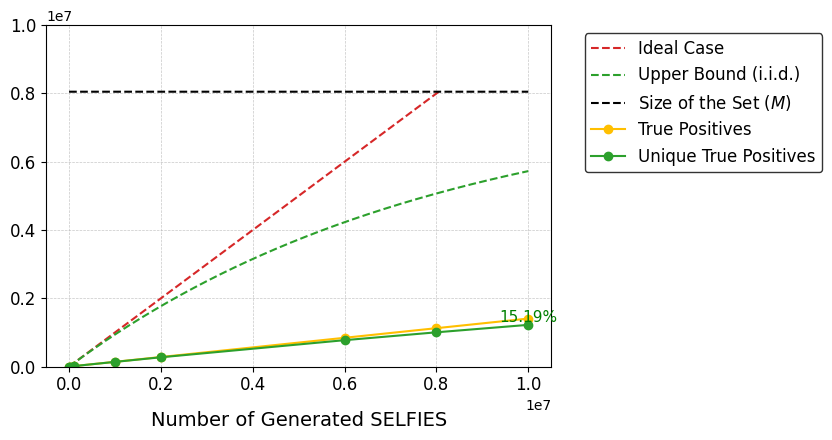

In [118]:
plot_gens_scatter(eqdist_canon_canon_df, subset_length=8051185, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/eqdist_canon_canon_1K_10M.pdf')

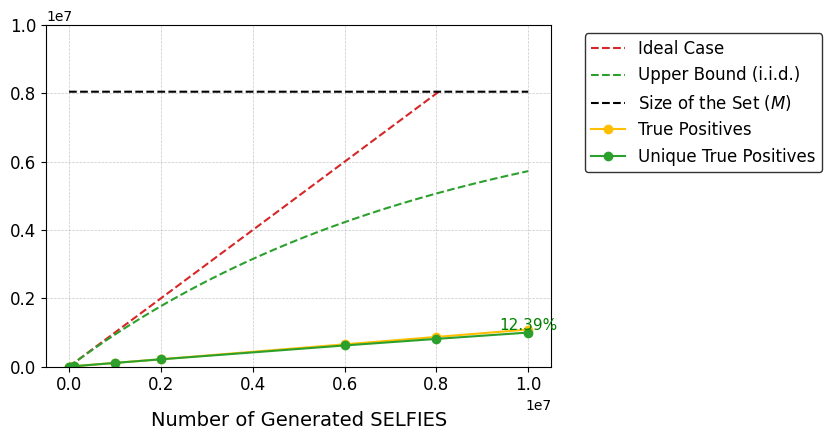

In [119]:
plot_gens_scatter(eqdist_canon_rand_df, subset_length=8051185, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/eqdist_canon_rand_1K_10M.pdf')

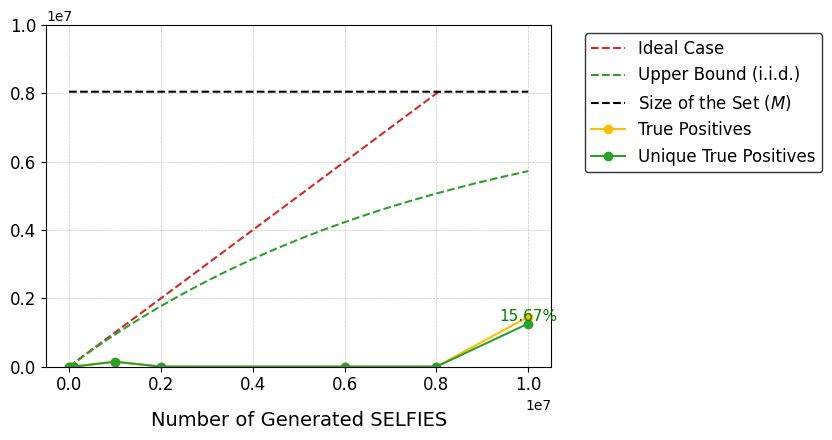

In [120]:
plot_gens_scatter(eqdist_rand_canon_df, subset_length=8051185, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/eqdist_rand_canon_1K_10M.pdf')

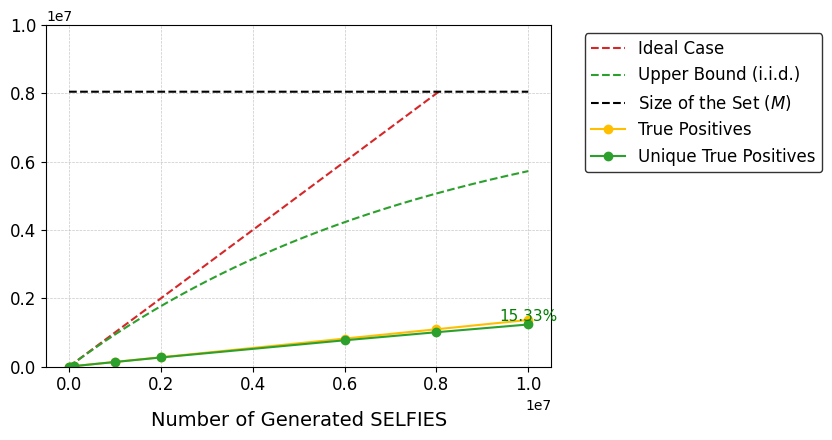

In [121]:
plot_gens_scatter(eqdist_rand_rand_df, subset_length=8051185, save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/eqdist_rand_rand_1K_10M.pdf')

## Predictions on 1K,5K,10K Validations

In [132]:
main_directory = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/predicted_generation_statistics/selfies'
subsets = ['aspirin', 'sas', 'druglike', 'eqdist']

canon_canon = {'1K': 'PRETRAIN_canon_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_1000_TEMP_1.xlsx', '5K': 'PRETRAIN_canon_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_5000_TEMP_1.xlsx', '10K':'PRETRAIN_canon_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_10000_TEMP_1.xlsx'}
canon_rand = {'1K': 'PRETRAIN_canon_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_1000_TEMP_1.xlsx', '5K': 'PRETRAIN_canon_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_5000_TEMP_1.xlsx', '10K':'PRETRAIN_canon_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_10000_TEMP_1.xlsx'}
rand_canon = {'1K': 'PRETRAIN_rand_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_1000_TEMP_1.xlsx', '5K': 'PRETRAIN_rand_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_5000_TEMP_1.xlsx', '10K':'PRETRAIN_rand_FINETUNE_canon_GEN_LEN_1M_VALID_LEN_10000_TEMP_1.xlsx'}
rand_rand = {'1K': 'PRETRAIN_rand_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_1000_TEMP_1.xlsx', '5K': 'PRETRAIN_rand_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_5000_TEMP_1.xlsx', '10K':'PRETRAIN_rand_FINETUNE_rand_GEN_LEN_1M_VALID_LEN_10000_TEMP_1.xlsx'}

stats = [canon_canon, canon_rand, rand_canon, rand_rand]
valid_lens = ['1K', '5K', '10K']

aspirin_df = pd.DataFrame()
sas_df = pd.DataFrame()
druglike_df = pd.DataFrame()
eqdist_df = pd.DataFrame()

for model in stats:
    for valid_len in valid_lens:
        aspirin_path = main_directory + '/' + 'aspirin' + '/'+ model[valid_len]
        sas_path = main_directory + '/' + 'sas' + '/'+ model[valid_len]
        druglike_path = main_directory + '/' + 'druglike' + '/'+ model[valid_len]
        eqdist_path = main_directory + '/' + 'eqdist' + '/'+ model[valid_len]

        aspirin_df = pd.concat([aspirin_df,pd.read_excel(aspirin_path)])
        sas_df = pd.concat([sas_df,pd.read_excel(sas_path)])
        druglike_df = pd.concat([druglike_df,pd.read_excel(druglike_path)])
        eqdist_df = pd.concat([eqdist_df,pd.read_excel(eqdist_path)])

        aspirin_df = aspirin_df.reset_index(drop=True)
        sas_df = sas_df.reset_index(drop=True)
        druglike_df = druglike_df.reset_index(drop=True)
        eqdist_df = eqdist_df.reset_index(drop=True)
        


In [123]:
def make_tabels(aspirin_df, sas_df, druglike_df, eqdist_df):
    models = {'canon_canon':2, 'canon_rand':5, 'rand_canon':8, 'rand_rand':11}
    for model in models:
        print('The model is:', model)
        a = aspirin_df[aspirin_df['Validation Length']==10000].loc[models[model]]
        b = sas_df[sas_df['Validation Length']==10000].loc[models[model]]
        c = druglike_df[druglike_df['Validation Length']==10000].loc[models[model]]
        d = eqdist_df[eqdist_df['Validation Length']==10000].loc[models[model]]
        metrics = pd.concat([a,b,c,d], axis=1).T
        PATH = f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/general_statistics/{model}.xlsx'
        print(metrics)
        # metrics.to_excel(PATH, index=False)

In [51]:
# path = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13_my/src/statistics/new_general_statistics/rand_canon.xlsx'
# pd.read_excel(path)

In [124]:
make_tabels(aspirin_df, sas_df, druglike_df, eqdist_df)

The model is: canon_canon
     Subset Actual Duplicated TP Predicted Duplicated TP Diff Duplicated TP  \
2   aspirin               756477                  739939              16538   
2       sas               805514                  799113               6401   
2  druglike               683074                  665395              17679   
2    eqdist               140421                  135075               5346   

  Actual Unique TP Predicted Unique TP Diff Unique TP Validation Length  \
2           713478              698421          15057             10000   
2           747632              741846           5786             10000   
2           648842              632650          16192             10000   
2           138420              133129           5291             10000   

  Sum Probs  
2  0.000893  
2  0.001202  
2  0.000713  
2  0.000168  
The model is: canon_rand
     Subset Actual Duplicated TP Predicted Duplicated TP Diff Duplicated TP  \
5   aspirin               70

In [125]:
def plot_valid_scatter(pretrain, finetune, subset, df):
    diff_dup_tp = list(df['Diff Duplicated TP'])
    diff_uniq_tp = list(df['Diff Unique TP'])
    valid = list(df['Validation Length'])

    plt.plot(valid, diff_dup_tp, marker='o', linestyle='-')
    plt.plot(valid, diff_uniq_tp, marker='o', linestyle='-')

    plt.xlabel('Validation Length')
    plt.ylabel('Differences')
    plt.title(f'Subset: {subset}, Pre-Train:{pretrain}, Fine-Tune:{finetune}')

    plt.grid(True)
    plt.legend(['Diff Duplicated TP','Diff Unique TP'])
    plt.show()

In [126]:
def plot_valid_stats(subset,df):
    plot_valid_scatter('canon', 'canon', subset,df[0:3])
    plot_valid_scatter('canon', 'rand', subset,df[3:6])
    plot_valid_scatter('rand', 'canon', subset,df[6:9])
    plot_valid_scatter('rand', 'rand', subset,df[9:12])

### Aspirin

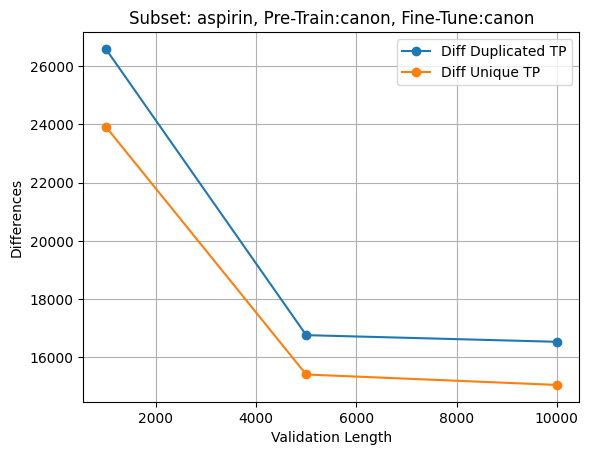

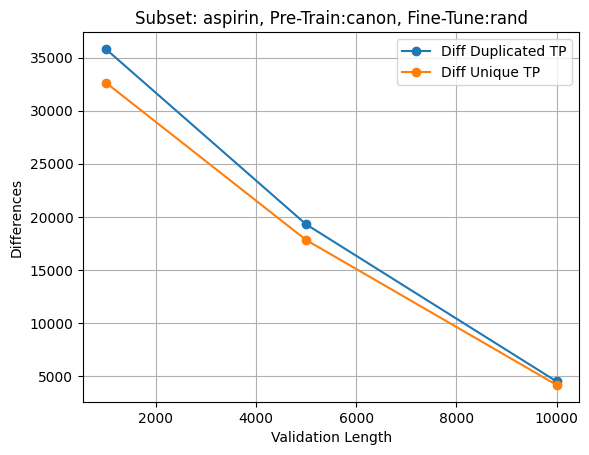

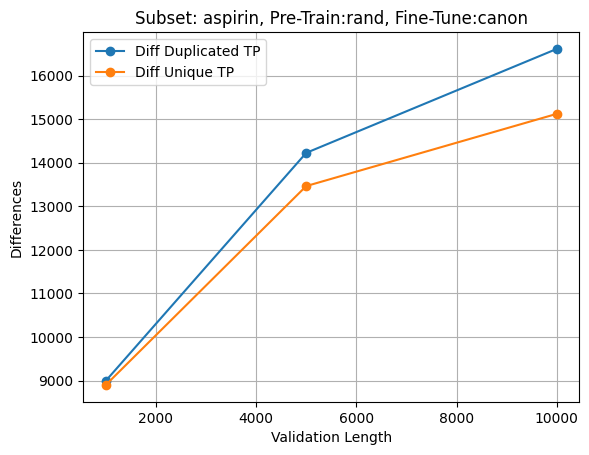

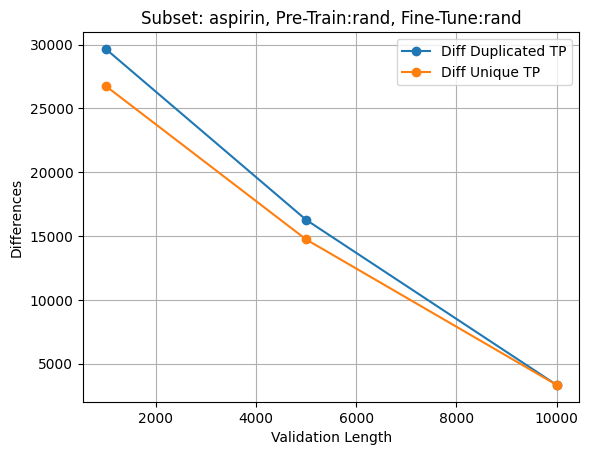

In [127]:
plot_valid_stats('aspirin', aspirin_df)

### Sas

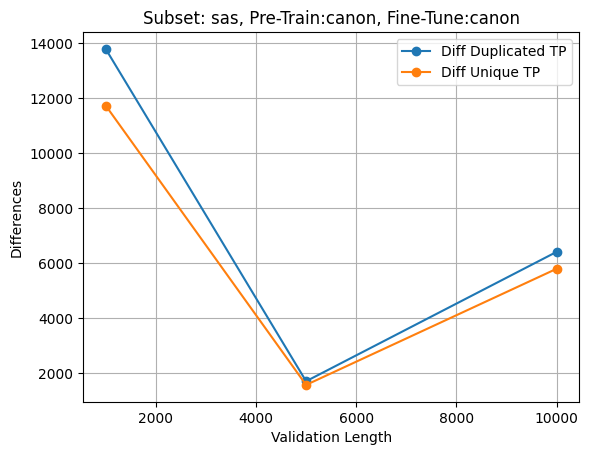

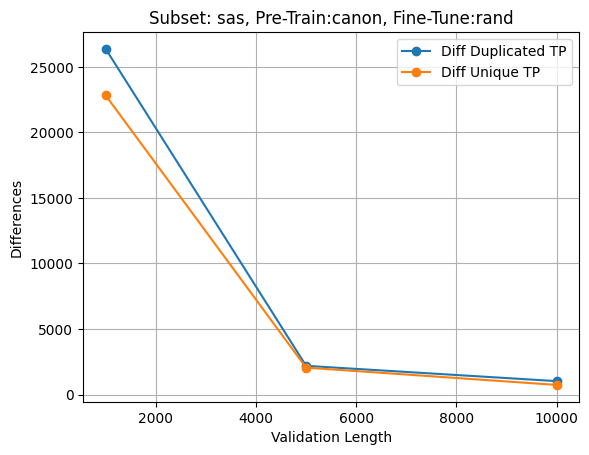

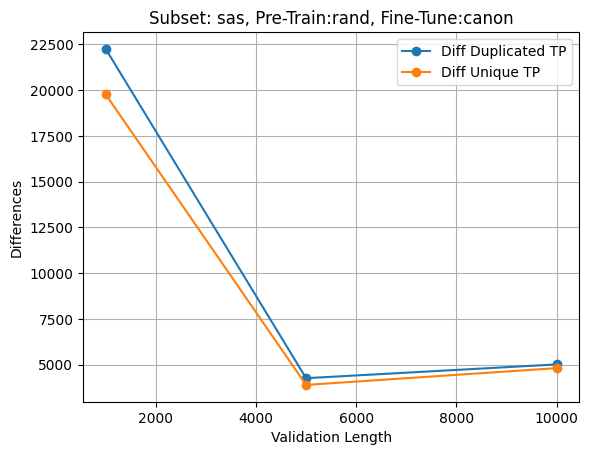

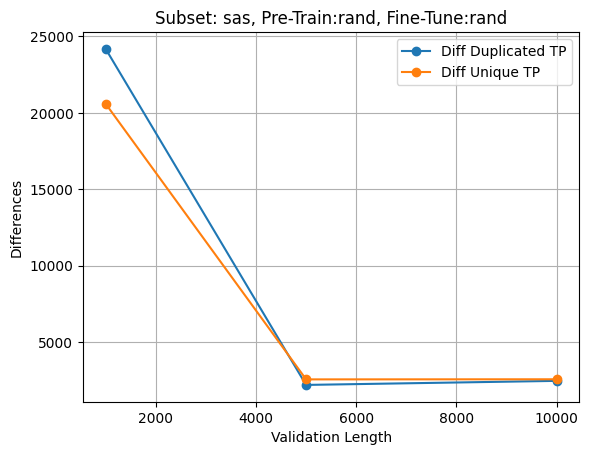

In [128]:
plot_valid_stats('sas', sas_df)

### Druglike

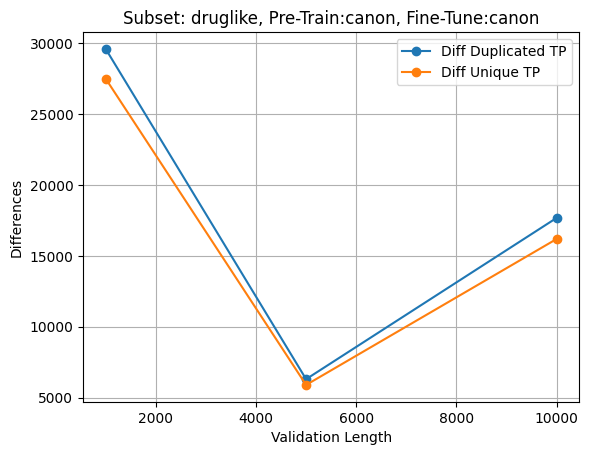

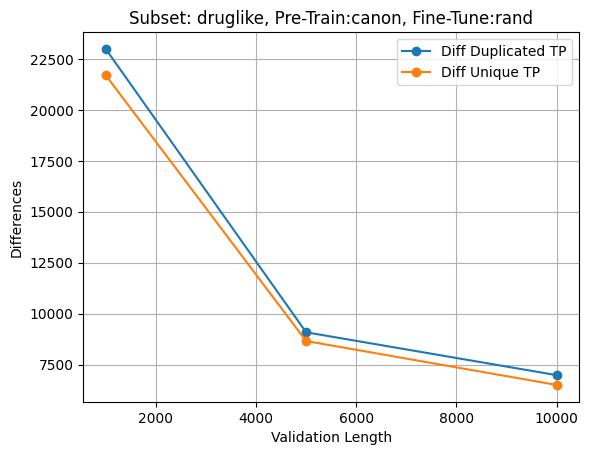

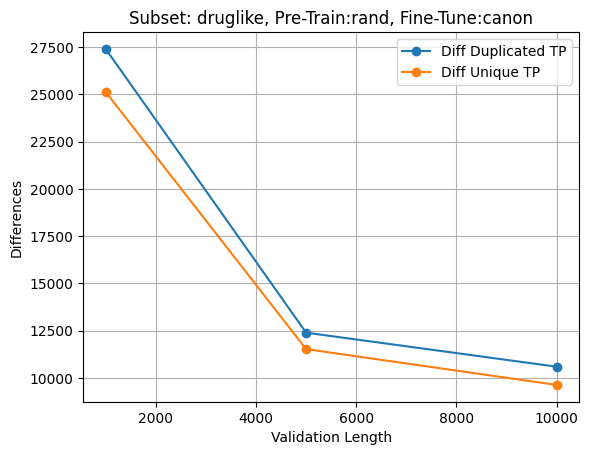

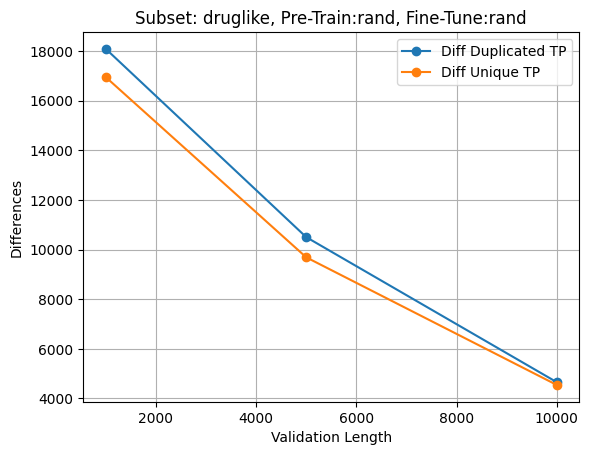

In [129]:
plot_valid_stats('druglike', druglike_df)

### Eqdist

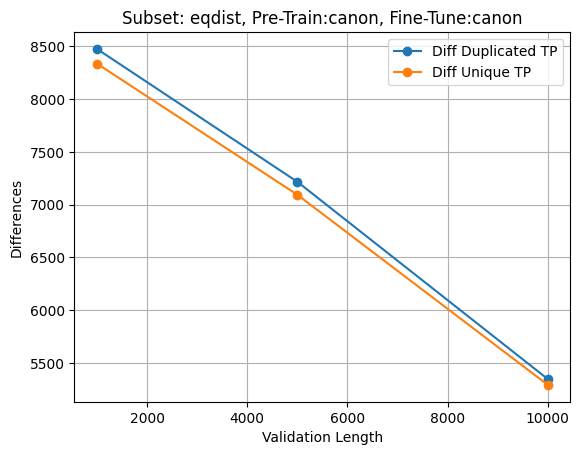

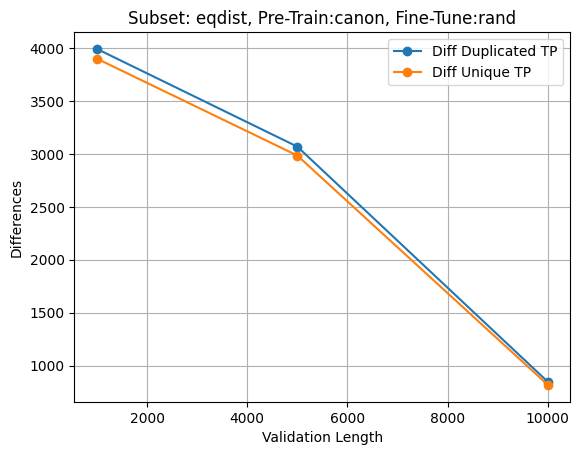

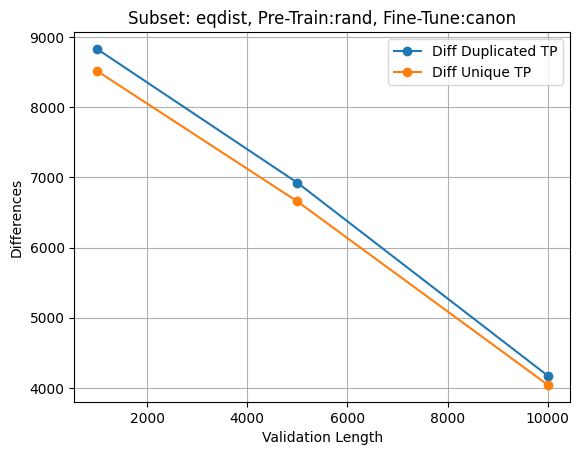

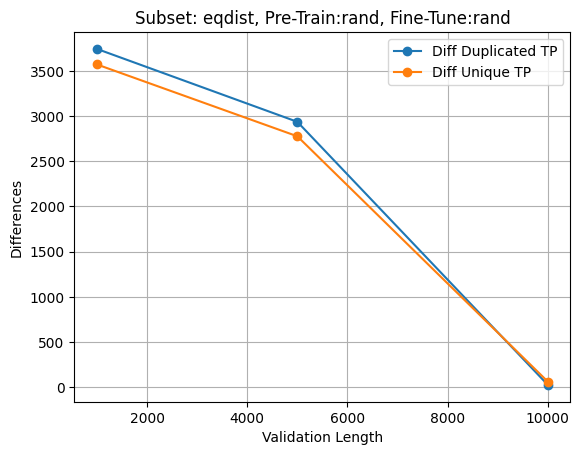

In [130]:
plot_valid_stats('eqdist', eqdist_df)

In [131]:
eqdist_df[eqdist_df['Validation Length']==10000]

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs
2,eqdist,140421,135075,5346,138420,133129,5291,10000,0.000168
5,eqdist,108781,107934,847,107819,107001,818,10000,0.000134
8,eqdist,145357,141184,4173,143095,139052,4043,10000,0.000175
11,eqdist,136743,136718,25,135225,135286,61,10000,0.000170


## Validation randomized SELFIES

In [133]:
aspirin = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/aspirin/probs.csv'
sas = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/sas/probs.csv'
druglike = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/druglike/probs.csv'
eqdist = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/eqdist/probs.csv'

In [134]:
def plot_rand_count_hist(valid_path):
    aspirin_df = pd.read_csv(valid_path)
    length = aspirin_df.shape[0]
    aspirin_df['Count'] = np.ones(length)
    count = (aspirin_df.groupby('Name')['Count'].sum()).to_list()
    plt.hist(count, bins=100)
    min_value = min(count)
    max_value = max(count)
    mean_value = sum(count)/10_000
    plt.plot([min_value,min_value],[0,2500])
    plt.plot([max_value,max_value],[0,2500])
    plt.plot([mean_value,mean_value],[0,2500])

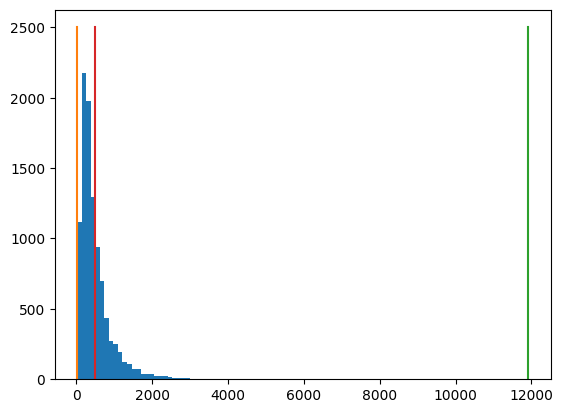

In [135]:
plot_rand_count_hist(aspirin)

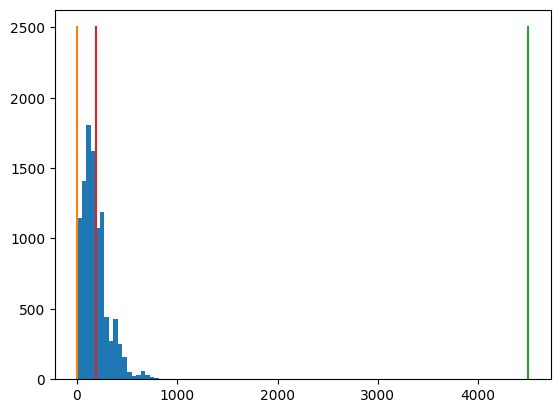

In [136]:
plot_rand_count_hist(sas)

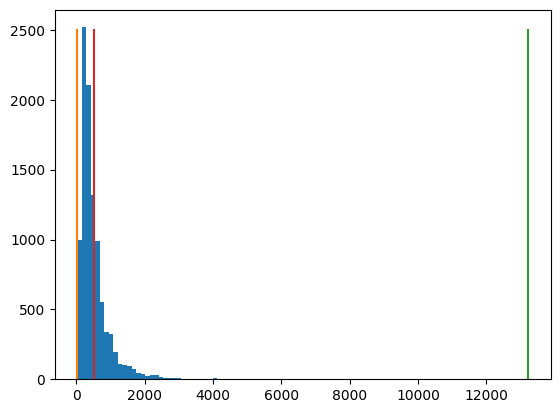

In [137]:
plot_rand_count_hist(druglike)

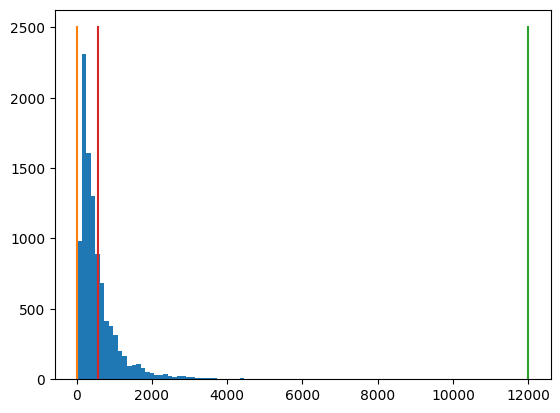

In [138]:
plot_rand_count_hist(eqdist)

## Predictions for M generations

In [3]:
subset = ['aspirin', 'sas', 'druglike', 'eqdist']
pretrain = ['canon', 'rand']
finetune = ['canon', 'rand']

df = pd.DataFrame([])
for s in subset:
    for p in pretrain:
        for f in finetune:
            print('Subset:', s)
            print('Pretrain:', p)
            print('Finetune:', f)
            df = pd.concat((df,pd.read_excel(f"/nfs/c9/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/predicted_generation_statistics/selfies/{s}/PRETRAIN_{p}_FINETUNE_{f}_GEN_LEN_8M_VALID_LEN_10000_TEMP_1.xlsx" )), axis=0)

Subset: aspirin
Pretrain: canon
Finetune: canon
Subset: aspirin
Pretrain: canon
Finetune: rand
Subset: aspirin
Pretrain: rand
Finetune: canon
Subset: aspirin
Pretrain: rand
Finetune: rand
Subset: sas
Pretrain: canon
Finetune: canon
Subset: sas
Pretrain: canon
Finetune: rand
Subset: sas
Pretrain: rand
Finetune: canon
Subset: sas
Pretrain: rand
Finetune: rand
Subset: druglike
Pretrain: canon
Finetune: canon
Subset: druglike
Pretrain: canon
Finetune: rand
Subset: druglike
Pretrain: rand
Finetune: canon
Subset: druglike
Pretrain: rand
Finetune: rand
Subset: eqdist
Pretrain: canon
Finetune: canon
Subset: eqdist
Pretrain: canon
Finetune: rand
Subset: eqdist
Pretrain: rand
Finetune: canon
Subset: eqdist
Pretrain: rand
Finetune: rand


In [4]:
aspirin = [8284280]*4  
sas = [6645440]*4 
druglike = [9331077]*4  
eqdist = [8051185]*4
subset_length = aspirin + sas  + druglike + eqdist
subset_length

[8284280,
 8284280,
 8284280,
 8284280,
 6645440,
 6645440,
 6645440,
 6645440,
 9331077,
 9331077,
 9331077,
 9331077,
 8051185,
 8051185,
 8051185,
 8051185]

In [5]:
df = df.drop(columns=['Actual Duplicated TP','Diff Duplicated TP',	'Actual Unique TP', 'Diff Unique TP', 'Validation Length', 'Sum Probs'])
df['Subset Length'] = subset_length
df['Recall'] = round((df['Predicted Unique TP']/df['Subset Length'])*100,2)
# df.to_excel('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13_my/src/statistics/predicted_generation_statistics/selfies/generation_subset_length.xlsx', index=False)
df

,Subset,Predicted Duplicated TP,Predicted Unique TP,Subset Length,Recall
0,aspirin,6129862,4006298,8284280,48.36
0,aspirin,5813255,3941328,8284280,47.58
0,aspirin,6176658,3993956,8284280,48.21
0,aspirin,6198695,4152079,8284280,50.12
0,sas,6620077,3883289,6645440,58.44
0,sas,6079218,3737469,6645440,56.24
0,sas,6608991,3852505,6645440,57.97
0,sas,6327757,3857903,6645440,58.05
0,druglike,5512319,3799680,9331077,40.72
0,druglike,5049079,3650561,9331077,39.12


## Ideal cases for 1M

In [6]:
def bound_recall(subset):
    return (1-(1-1/subset)**1_000_000)

In [7]:
def bound_precision(subset):
    return (1/subset)*10_000_000

In [8]:
aspirin = 8284280  
sas = 6645440 
druglike = 9331077  
eqdist = 8051185 

In [9]:
print('Aspirin:',bound_precision(aspirin))
print('Sas:',bound_precision(sas))
print('Druglike:',bound_precision(druglike))
print('Eqdist:',bound_precision(eqdist))

Aspirin: 1.2071055058496332
Sas: 1.5047912553570568
Druglike: 1.0716876519184229
Eqdist: 1.2420531884436887


In [10]:
print('Aspirin:',bound_recall(aspirin))
print('Sas:',bound_recall(sas))
print('Druglike:',bound_recall(druglike))
print('Eqdist:',bound_recall(eqdist))

Aspirin: 0.11370954770653685
Sas: 0.13970432167242552
Druglike: 0.10162595923444906
Eqdist: 0.11680152180697789


## Beam Plots

In [13]:
beam_10M = pd.read_csv('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/beam_generations/selfies/aspirin/beam_iter_length_33_original_10M.csv')
# beam_1M = pd.read_csv('/mnt/2tb/chem/new_hypothesis_datahasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/beam_generations/selfies/aspirin/beam_iter_length_33_original_1M.csv')

In [15]:
beam_1M = beam_10M[:1_000_000]
beam_2M = beam_10M[:2_000_000]
beam_3M = beam_10M[:3_000_000]
beam_4M = beam_10M[:4_000_000]
beam_5M = beam_10M[:5_000_000]
beam_6M = beam_10M[:6_000_000]
beam_7M = beam_10M[:7_000_000]
beam_8M = beam_10M[:8_000_000]
beam_9M = beam_10M[:9_000_000]


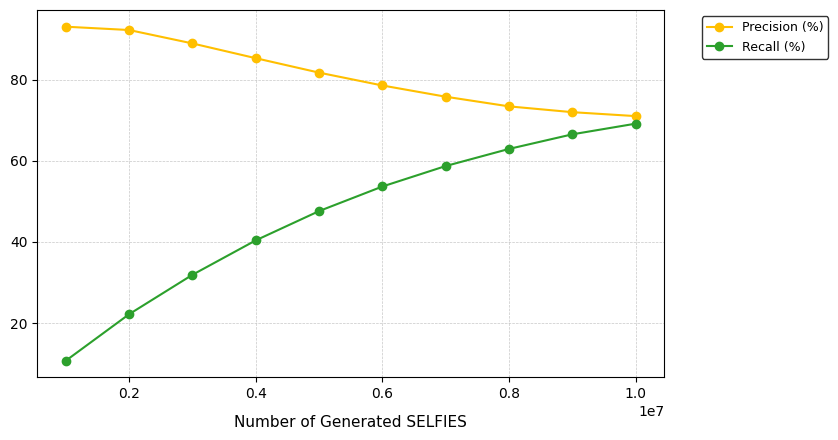

In [17]:
save = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/beam_1M_10M.pdf'
beam_size = [1_000_000,2_000_000,3_000_000,4_000_000,5_000_000,6_000_000,7_000_000, 8_000_000, 9_000_000, 10_000_000]
precision = [93.08, 92.26, 88.95, 85.31, 81.75, 78.58, 75.81, 73.43, 72.00, 71.03]
recall =    [10.71, 22.18, 31.90, 40.39, 47.61, 53.67, 58.72, 62.94, 66.54, 69.17]

plt.figure(figsize=(8.5, 4.5))

# Add labels and title
plt.xlabel('Number of Generated SELFIES', fontsize=11, labelpad=10)

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('white')

# Plot actual data points
plt.plot(beam_size, precision, marker='o', linestyle='-', color='#ffbf00', label='Precision (%)')
plt.plot(beam_size, recall, marker='o', linestyle='-', color='#2ca02c', label='Recall (%)')
# Position the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9, edgecolor='black')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig(save, format='pdf')
# Show the plot
plt.show()

## Prediction Scatters

In [18]:
def collect_general_statistics(gen_len, str_type):
    subset_names = ['aspirin', 'sas', 'druglike', 'eqdist']
    train = ['canon', 'rand']
    subset_length = [8284280]*4 + [6645440]*4 + [9331077]*4 + [8051185]*4

    df = pd.DataFrame([])

    for subset in subset_names:
        for pretrain in train:
            for finetune in train:
                data = pd.read_excel(f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/statistics/predicted_generation_statistics/{str_type}/{subset}/PRETRAIN_{pretrain}_FINETUNE_{finetune}_GEN_LEN_{gen_len}_VALID_LEN_10000_TEMP_1.xlsx')
                df = pd.concat([df, data])
    df['Subset Length'] = subset_length
    df['Recall'] = (df['Actual Unique TP']/df['Subset Length'])*100
    df['Pred Recall'] = (df['Predicted Unique TP']/df['Subset Length'])*100
    return df

In [27]:
gen_1M = collect_general_statistics(gen_len='1M', str_type='selfies')
gen_1M['Generation Length'] = ['1M']*16
gen_1M

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Pred Recall,Generation Length
0,aspirin,756477,739939,16538,713478,698421,15057,10000,0.000893,8284280,8.612432,8.430678,1M
0,aspirin,706235,701721,4514,670684,666497,4187,10000,0.000847,8284280,8.095863,8.045322,1M
0,aspirin,762199,745588,16611,717396,702275,15121,10000,0.000900,8284280,8.659727,8.477200,1M
0,aspirin,751584,748248,3336,712999,709660,3339,10000,0.000903,8284280,8.606650,8.566345,1M
0,sas,805514,799113,6401,747632,741846,5786,10000,0.001202,6645440,11.250301,11.163234,1M
0,sas,732804,733826,1022,686069,686801,732,10000,0.001104,6645440,10.323906,10.334921,1M
0,sas,802788,797775,5013,744248,739439,4809,10000,0.001200,6645440,11.199379,11.127013,1M
0,sas,761359,763827,2468,711659,714231,2572,10000,0.001149,6645440,10.708982,10.747686,1M
0,druglike,683074,665395,17679,648842,632650,16192,10000,0.000713,9331077,6.953560,6.780032,1M
0,druglike,616461,609477,6984,590468,583964,6504,10000,0.000653,9331077,6.327973,6.258270,1M


In [28]:
gen_10M = collect_general_statistics(gen_len='10M', str_type='selfies')
gen_10M['Generation Length'] = ['10M']*16
gen_10M

,Subset,Actual Duplicated TP,Predicted Duplicated TP,Diff Duplicated TP,Actual Unique TP,Predicted Unique TP,Diff Unique TP,Validation Length,Sum Probs,Subset Length,Recall,Pred Recall,Generation Length
0,aspirin,7569055,7399390,169665,4558240,4486343,71897,10000,0.000893,8284280,55.022766,54.154893,10M
0,aspirin,7059369,7017213,42156,4452203,4433416,18787,10000,0.000847,8284280,53.742788,53.516009,10M
0,aspirin,7616563,7455878,160685,4540085,4468146,71939,10000,0.000900,8284280,54.803616,53.935236,10M
0,aspirin,7515469,7482479,32990,4672525,4659205,13320,10000,0.000903,8284280,56.402307,56.241520,10M
0,sas,8058081,7991131,66950,4303269,4279902,23367,10000,0.001202,6645440,64.755216,64.403591,10M
0,sas,7326080,7338257,12177,4134374,4143258,8884,10000,0.001104,6645440,62.213698,62.347384,10M
0,sas,8026134,7977750,48384,4265002,4245006,19996,10000,0.001200,6645440,64.179377,63.878479,10M
0,sas,7617117,7638271,21154,4258098,4269162,11064,10000,0.001149,6645440,64.075486,64.241976,10M
0,druglike,6827435,6653951,173484,4369476,4293835,75641,10000,0.000713,9331077,46.827135,46.016499,10M
0,druglike,6163090,6094771,68319,4189576,4152256,37320,10000,0.000653,9331077,44.899169,44.499215,10M


In [29]:
df = pd.concat([gen_10M, gen_1M]) 

# List of columns to keep
columns_to_keep = ['Subset', 'Recall', 'Pred Recall', 'Generation Length']

# Select the specified columns
df = df.loc[:, columns_to_keep]
df

,Subset,Recall,Pred Recall,Generation Length
0,aspirin,55.022766,54.154893,10M
0,aspirin,53.742788,53.516009,10M
0,aspirin,54.803616,53.935236,10M
0,aspirin,56.402307,56.241520,10M
0,sas,64.755216,64.403591,10M
0,sas,62.213698,62.347384,10M
0,sas,64.179377,63.878479,10M
0,sas,64.075486,64.241976,10M
0,druglike,46.827135,46.016499,10M
0,druglike,44.899169,44.499215,10M


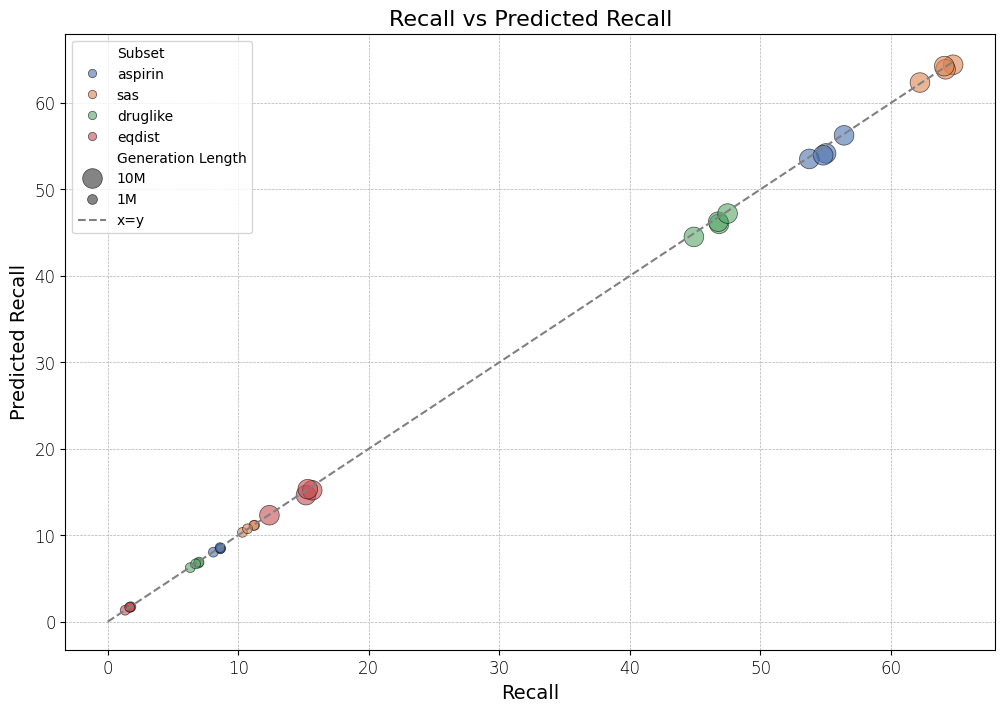

In [31]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df, x='Recall', y='Pred Recall', hue='Subset', size='Generation Length', sizes=(50, 200), palette='deep', alpha=0.6, edgecolor='black')

# Add the x=y line
plt.plot([0, max(df['Recall'].max(), df['Pred Recall'].max())], [0, max(df['Recall'].max(), df['Pred Recall'].max())], linestyle='--', color='grey', label='x=y')

# Add labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Predicted Recall', fontsize=14)
plt.title('Recall vs Predicted Recall', fontsize=16)

# Customize ticks
plt.xticks(fontsize=12, fontweight='light')
plt.yticks(fontsize=12, fontweight='light')

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show legend
plt.legend()

plt.savefig('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/recall_pred_recall_all.pdf')
# Show the plot
plt.show()
